In [1]:
# Import relevant libraries

import numpy as np
import matplotlib.pyplot
%matplotlib inline
import time

In [2]:
# Create function to convert data into csv file

def convert(imgs, labels, outfile, n):

    imgf = open(imgs, "rb")
    labelf = open(labels, "rb")
    csvf = open(outfile, "w")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))]
        for j in range(28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image)+"\n")
        
    imgf.close()
    labelf.close()
    csvf.close()

In [3]:
# Load in training and testing data

mnist_train_x = "/Users/kavittolia/code/islp/Chapter10/mnist/train-images.idx3-ubyte"
mnist_train_y = "/Users/kavittolia/code/islp/Chapter10/mnist/train-labels.idx1-ubyte"
mnist_test_x = "/Users/kavittolia/code/islp/Chapter10/mnist/t10k-images.idx3-ubyte"
mnist_test_y = "/Users/kavittolia/code/islp/Chapter10/mnist/t10k-labels.idx1-ubyte"

In [4]:
# Convert data into csv files

convert(mnist_train_x, mnist_train_y, "/Users/kavittolia/code/islp/Chapter10/mnist/train.csv", 60000)
convert(mnist_test_x, mnist_test_y, "/Users/kavittolia/code/islp/Chapter10/mnist/test.csv", 10000)

In [5]:
# Check the training data is accurate

train_file = open("/Users/kavittolia/code/islp/Chapter10/mnist/train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))

60000


In [6]:
# The output gives you the digit and then the pixel scores

train_list[10]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,247,254,254,254,254,254,254,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,246,254,254,254,254,254,171,0,0,0,0,0,0,0,0,0,0

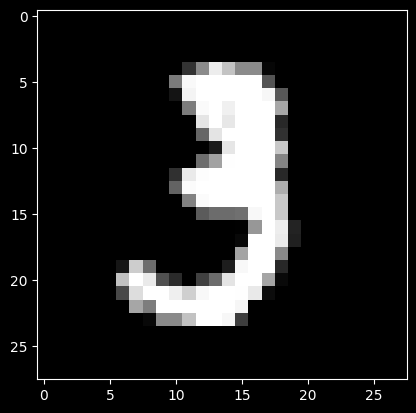

In [7]:
# Check the digit image is as expected

values = train_list[10].split(",")
image_array = np.asfarray(values[1:]).reshape(28,28)
matplotlib.pyplot.style.use('dark_background')
matplotlib.pyplot.imshow(image_array, cmap="Greys_r", interpolation="None")

In [8]:
# Check the test data is accurate

test_file = open("/Users/kavittolia/code/islp/Chapter10/mnist/test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [9]:
# For the neural network, we need 784 inputs and two hidden layers
# Hidden layer 1 will have 128 nodes
# Hidden layer 2 will have 64 nodes

class DNN:

    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = lr
        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]
        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1./hidden_1),       # 128 x 784
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1./hidden_2),          # 64 x 128
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1./output_layer)   # 10 x 64
        }

    def activation_function(self, x, func_type, derivative=False):
        if derivative:
            if func_type == 'sigmoid':
                return (np.exp(-x)) / ((np.exp(-x) + 1) ** 2)
            elif func_type == 'tanh':
                return 1 - (((np.exp(x) - np.exp(-x)) ** 2) / ((np.exp(x) + np.exp(-x)) ** 2))
            elif func_type == 'softmax':
                exps = np.exp(x-x.max())
                return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
            elif func_type == 'relu':
                return (x > 0) * 1
            else:
                print('Unrecognised activation function!')
        else:
            if func_type == 'sigmoid':
                return 1 / (1 + np.exp(-x))
            elif func_type == 'tanh':
                return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
            elif func_type == 'softmax':
                exps = np.exp(x-x.max())
                return exps / np.sum(exps, axis=0)
            elif func_type == 'relu':
                return np.maximum(0.0, x)
            else:
                print('Unrecognised activation function!')            

    def forward_pass(self, x_train, func_type):
        params = self.params
        params['A0'] = x_train                              # 784 x 1
        # input_layer to hidden_1
        params['Z1'] = np.dot(params['W1'], params['A0'])   # 128 x 1
        params['A1'] = self.activation_function(params['Z1'], func_type)
        # hidden_1 to hidden_2
        params['Z2'] = np.dot(params['W2'], params['A1'])   # 64 x 1
        params['A2'] = self.activation_function(params['Z2'], func_type)
        # hidden_2 to output_layer
        params['Z3'] = np.dot(params['W3'], params['A2'])   # 10 x 1
        params['A3'] = self.activation_function(params['Z3'], 'softmax')
        return params['Z3']

    def backward_pass(self, y_train, output, func_type):
        params = self.params
        change_w = {}
        # calculate W3 update
        error = 2 * (output - y_train) / output.shape[0] * self.activation_function(params['Z3'], 'softmax', derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])
        # calculate W2 update
        error = np.dot(params['W3'].T, error) * self.activation_function(params['Z2'], func_type, derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])
        # calculate W1 update
        error = np.dot(params['W2'].T, error) * self.activation_function(params['Z1'], func_type, derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])
        return change_w

    def update_weights(self, change_w):
        for param_name, gradient in change_w.items():
            self.params[param_name] -= self.learning_rate * gradient      # W_t+1 = W_t - lr * Delta_W_t           

    def compute_accuracy(self, test_data, func_type):
        predictions = []
        for x in test_data:
            values = x.split(",")
            inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs, func_type)
            pred = np.argmax(output)
            predictions.append(pred==np.argmax(targets))
        return np.mean(predictions)
    
    def predict_image(self, test_image, func_type):
        values = test_image.split(",")
        inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
        output = self.forward_pass(inputs, func_type)
        return np.argmax(output)

    def train(self, train_list, test_list, func_type):
        output_data = []
        for i in range(self.epochs):
            start_time = time.time()
            for x in train_list:
                values = x.split(",")
                inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs, func_type)
                change_w = self.backward_pass(targets, output, func_type)
                self.update_weights(change_w)
            accuracy = self.compute_accuracy(test_list, func_type)
            print('Epoch: {0}, Time Spent: {1:.02f}s, Accuracy: {2:.2f}%, Learning Rate: {3}, Activation Function: {4}'.format(i + 1, time.time() - start_time, accuracy * 100, self.learning_rate, func_type))
            output_data.append([i + 1, time.time() - start_time, accuracy * 100, self.learning_rate, func_type])
        return output_data

In [10]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=10, lr=1)
output_data = dnn.train(train_list, test_list, 'tanh')

Epoch: 1, Time Spent: 47.12s, Accuracy: 93.91%, Learning Rate: 1, Activation Function: tanh
Epoch: 2, Time Spent: 68.69s, Accuracy: 95.41%, Learning Rate: 1, Activation Function: tanh
Epoch: 3, Time Spent: 54.26s, Accuracy: 96.02%, Learning Rate: 1, Activation Function: tanh
Epoch: 4, Time Spent: 48.89s, Accuracy: 96.42%, Learning Rate: 1, Activation Function: tanh
Epoch: 5, Time Spent: 50.26s, Accuracy: 96.53%, Learning Rate: 1, Activation Function: tanh
Epoch: 6, Time Spent: 49.89s, Accuracy: 96.53%, Learning Rate: 1, Activation Function: tanh
Epoch: 7, Time Spent: 55.42s, Accuracy: 96.52%, Learning Rate: 1, Activation Function: tanh
Epoch: 8, Time Spent: 51.57s, Accuracy: 96.32%, Learning Rate: 1, Activation Function: tanh
Epoch: 9, Time Spent: 52.34s, Accuracy: 96.72%, Learning Rate: 1, Activation Function: tanh
Epoch: 10, Time Spent: 49.72s, Accuracy: 96.75%, Learning Rate: 1, Activation Function: tanh


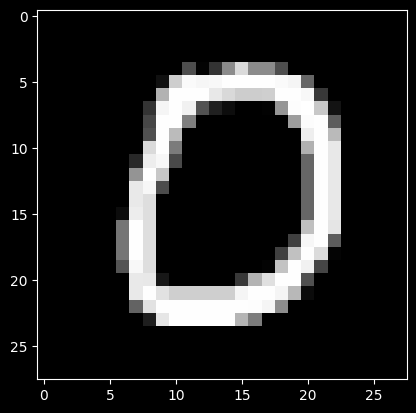

In [11]:
# Test random image
idx = 10
values = test_list[idx].split(",")
image_array = np.asfarray(values[1:]).reshape(28,28)
matplotlib.pyplot.style.use('dark_background')
matplotlib.pyplot.imshow(image_array, cmap="Greys_r", interpolation="None")

In [12]:
dnn.predict_image(test_list[idx], 'tanh')

0

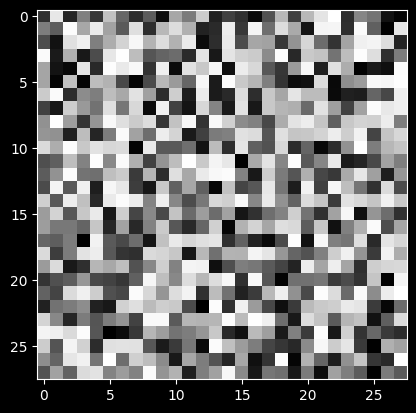

In [13]:
# Create gibberish digit
rubbish_vector = np.random.randint(0, 256, (785))
rubbish_matrix = rubbish_vector[1:].reshape(28,28)
matplotlib.pyplot.style.use('dark_background')
matplotlib.pyplot.imshow(rubbish_matrix, cmap="Greys_r", interpolation="None")

In [14]:
rubbish_str = ','.join(map(str, rubbish_vector)) 
dnn.predict_image(rubbish_str, 'tanh')

8

In [ ]:
# Researching how learning rates and activation functions co-behave

lr_list = [1, 0.1, 0.01, 0.001]
act_func_list = ['sigmoid', 'tanh', 'relu']

dnn_list = []
output_all = []

for lr_iter in lr_list:
    dnn = DNN(sizes=[784, 128, 64, 10], epochs=10, lr=lr_iter)
    for act_func in act_func_list:
        output_all.append(dnn.train(train_list, test_list, act_func))
        dnn_list.append(dnn)

In [ ]:
import pandas as pd
df = pd.DataFrame(np.concatenate(output_all))
df.to_csv("output_data.csv")

In [15]:
import pandas as pd
df = pd.read_csv("output_data.csv", index_col=0).rename(columns={"0": "epoch", "1": "time", "2": "accuracy", "3": "learning_rate", "4": "activation"})

In [16]:
df

,epoch,time,accuracy,learning_rate,activation
0,1,52.449412,91.97,1.000,sigmoid
1,2,65.883317,93.72,1.000,sigmoid
2,3,66.973721,94.51,1.000,sigmoid
3,4,66.589889,95.22,1.000,sigmoid
4,5,65.084656,95.76,1.000,sigmoid
...,...,...,...,...,...
115,6,42.649174,80.77,0.001,relu
116,7,42.811359,82.03,0.001,relu
117,8,42.879764,82.82,0.001,relu
118,9,42.573473,83.48,0.001,relu


In [17]:
import plotly.express as px

px.line(
    df,
    x="epoch",
    y="accuracy",
    color="activation",
    facet_col="learning_rate",
    facet_col_wrap=2,
    height=600,
    log_y=True,
).update_yaxes(matches=None)
